<a href="https://colab.research.google.com/github/Schreiner-F/Sistemas-de-Control-2-2025/blob/main/1.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control
!pip install xlrd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import ss2tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
archivo = '/content/drive/MyDrive/FACULTAD /Sistemas de control 2 - Python/Curvas_Medidas_RLC_2025.xls'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Numerador: [[ 0.00000000e+00  2.76141384e+04 -7.45058060e-09]]
Denominador: [1.00000000e+00 2.76141384e+04 5.30194851e+07]


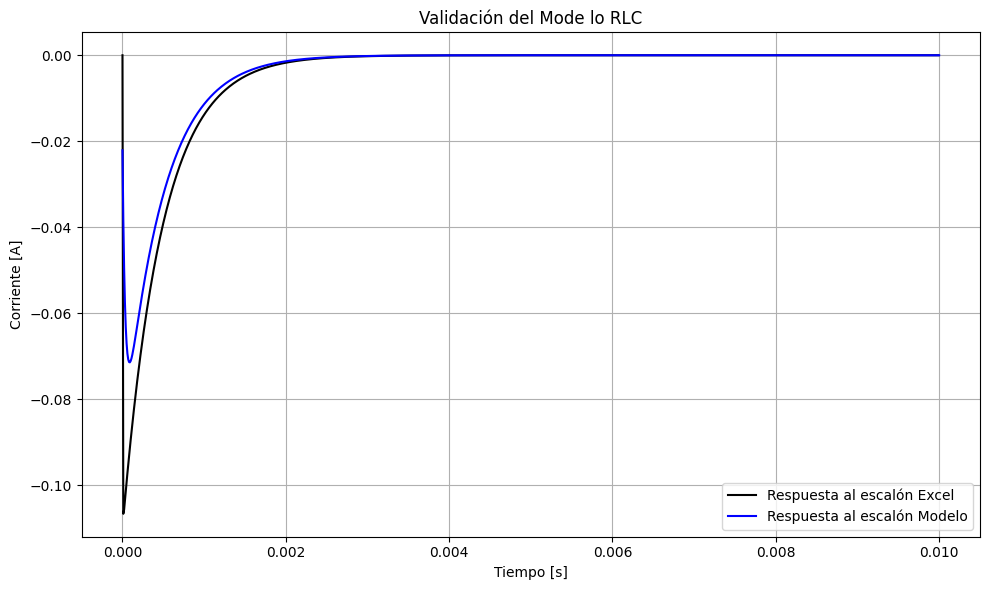

In [ ]:
# Parámetros
R = 282.3
L = 29.4e-3
C = 2.177e-6

# Matrices del sistema en espacio de estados
A = np.array([[-R/L, -1/L],
              [1/C,   0]])
B = np.array([[1/L],
              [0]])
C_mat = np.array([[R, 0]])
D = np.array([[0]])

# Obtener función de transferencia
num, den = ss2tf(A, B, C_mat, D)
print("Numerador:", num)
print("Denominador:", den)

# Simulación
At = 1e-5  # paso de simulación
T = 1e-2   # duración
Kmax = int(T / At)

Vc = np.zeros(Kmax)
I = np.zeros(Kmax)
u = np.zeros(Kmax)
t = np.linspace(0, T, Kmax)
x = np.array([[0.0], [0.0]])  # [I; Vc]
X0 = np.array([[0.0], [0.0]])

vin = 0
for i in range(Kmax):
    vin = -12
    u[i] = vin
    xp = A @ (x - X0) + B * u[i]
    x = x + xp * At
    I[i] = x[0, 0]
    Vc[i] = x[1, 0]


t0 = pd.read_excel(archivo, sheet_name='Hoja1', usecols="A", skiprows=4999, nrows=1000).squeeze()-.05
im = pd.read_excel(archivo, sheet_name='Hoja1', usecols="B", skiprows=4999, nrows=1000).squeeze()

# Graficar resultados
plt.figure(figsize=(10,6))
plt.plot(t0, im, 'k', label='Respuesta al escalón Excel')
plt.plot(t, I, 'b', label='Respuesta al escalón Modelo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Corriente [A]')
plt.title('Validación del Mode lo RLC')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()